In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
# Veriyi yükleyelim
data = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Verinin yapısını inceleyelim
data.info()

# Eksik değer kontrolü
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
features = data[['CustomerID', 'Annual Income (k$)', 'Age']]  # Özellikleri belirleyin

In [5]:
from sklearn.preprocessing import StandardScaler #Bu adımda, veriyi standartlaştırıyoruz.

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Optimal K: 10


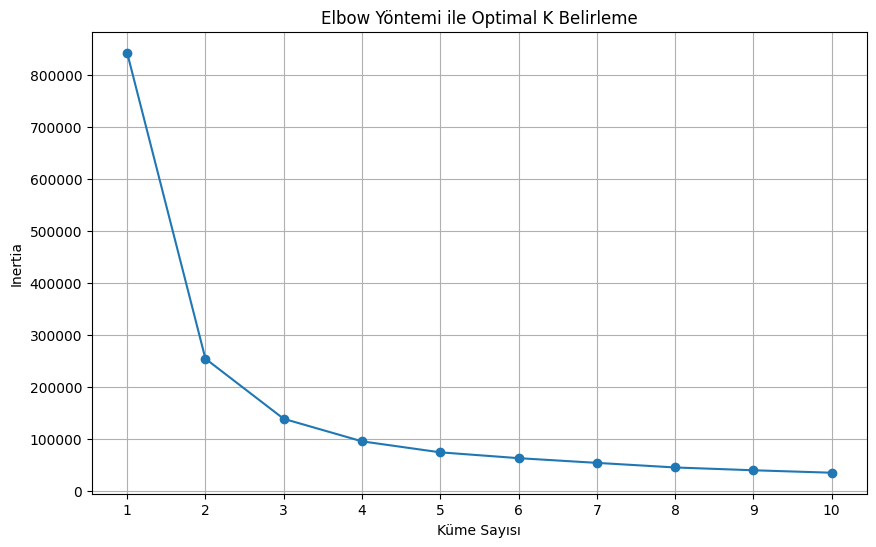

In [6]:
#Elbow metodu ile en iyi küme sayısını belirleyelim.

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings #uyarıları gizlemek için
warnings.filterwarnings("ignore", category=FutureWarning)

# Küme sayısını belirleme
inertia = []
k_range = range(1, 11)  # 1 ile 10 arasında küme sayıları

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # n_init'i belirtin
    kmeans.fit(features)  # 'features' kümelemek istediğiniz veriler
    inertia.append(kmeans.inertia_)

# Optimal K değerini belirleme (En düşük inercianın olduğu k)
optimal_k = k_range[inertia.index(min(inertia))]
print(f"Optimal K: {optimal_k}")

# Elbow grafiğini çizme
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Yöntemi ile Optimal K Belirleme')
plt.xlabel('Küme Sayısı')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid()
plt.show()


In [7]:
kmeans = KMeans(n_clusters=optimal_k, n_init=10)  # n_init değerini belirleyin
kmeans.fit(scaled_features)  # Veriyi fit et
clusters = kmeans.predict(scaled_features)  # Küme tahminlerini al

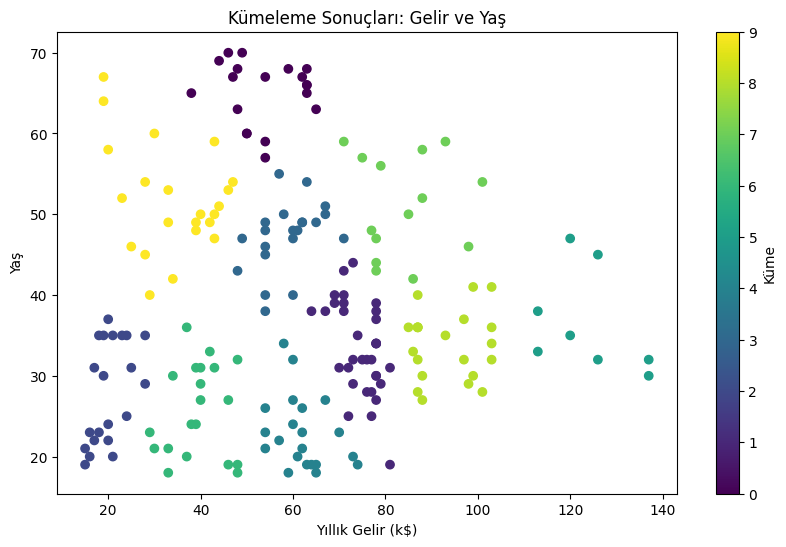

In [8]:
import matplotlib.pyplot as plt

# Küme sonuçlarını ekle
data['Cluster'] = clusters

plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Age'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Yıllık Gelir (k$)')
plt.ylabel('Yaş')
plt.title('Kümeleme Sonuçları: Gelir ve Yaş')
plt.colorbar(label='Küme')
plt.show()

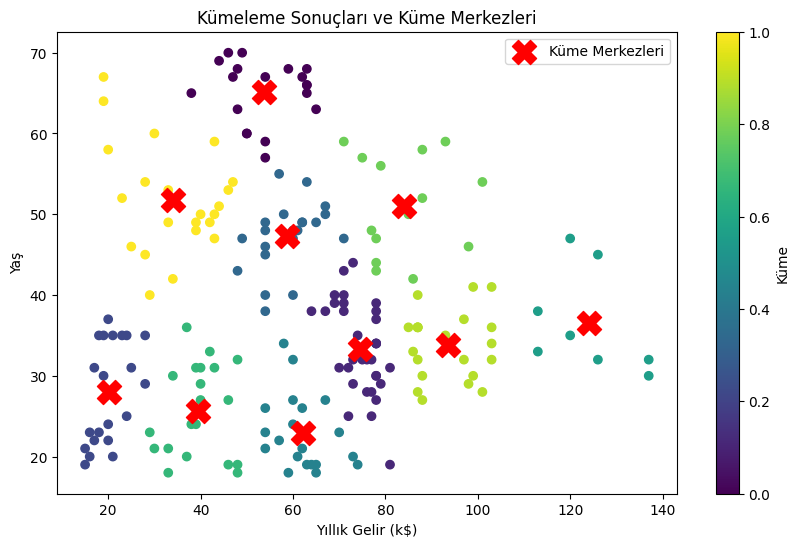

In [9]:
#Küme merkezlerini grafikte işaretleyelim:

centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Age'], c=data['Cluster'], cmap='viridis')
plt.scatter(centers[:, 1], centers[:, 2], s=300, c='red', label='Küme Merkezleri', marker='X')
plt.xlabel('Yıllık Gelir (k$)')
plt.ylabel('Yaş')
plt.title('Kümeleme Sonuçları ve Küme Merkezleri')
plt.colorbar(label='Küme')
plt.legend()
plt.show()

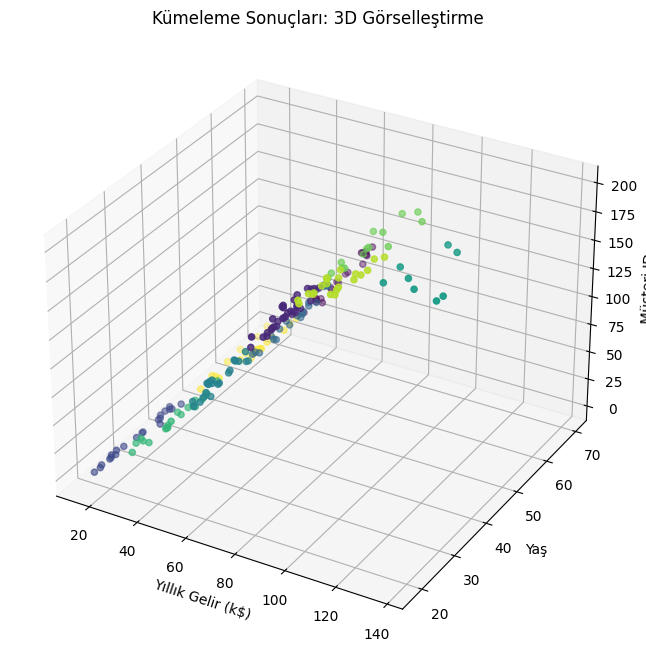

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Annual Income (k$)'], data['Age'], data['CustomerID'], c=data['Cluster'], cmap='viridis')
ax.set_xlabel('Yıllık Gelir (k$)')
ax.set_ylabel('Yaş')
ax.set_zlabel('Müşteri ID')
plt.title('Kümeleme Sonuçları: 3D Görselleştirme')
plt.show()

In [11]:
# Küme büyüklüklerini inceleyelim
cluster_sizes = data['Cluster'].value_counts()
print("Küme Büyüklükleri:")
print(cluster_sizes)

Küme Büyüklükleri:
Cluster
1    33
9    22
2    21
3    21
4    21
8    21
6    20
0    19
7    14
5     8
Name: count, dtype: int64


In [12]:
# Küme özelliklerini inceleyelim
cluster_means = data.groupby('Cluster')[['Annual Income (k$)', 'Age']].mean()
print("\nKüme Ortalamaları:")
print(cluster_means)


Küme Ortalamaları:
         Annual Income (k$)        Age
Cluster                               
0                 53.684211  65.157895
1                 74.575758  33.363636
2                 20.190476  27.952381
3                 58.761905  47.285714
4                 62.095238  22.904762
5                124.000000  36.500000
6                 39.500000  25.700000
7                 83.928571  51.071429
8                 93.571429  33.761905
9                 33.954545  51.818182


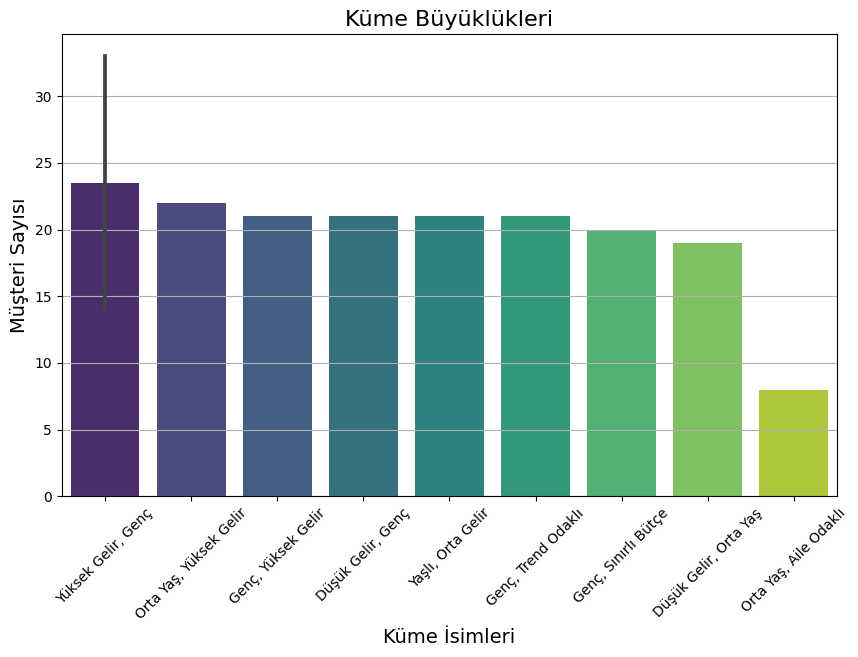

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Küme isimlerini tanımladım
cluster_names = {
    0: "Düşük Gelir, Orta Yaş",
    1: "Yüksek Gelir, Genç",
    2: "Genç, Yüksek Gelir",
    3: "Düşük Gelir, Genç",
    4: "Yaşlı, Orta Gelir",
    5: "Orta Yaş, Aile Odaklı",
    6: "Genç, Sınırlı Bütçe",
    7: "Yüksek Gelir, Genç",
    8: "Genç, Trend Odaklı",
    9: "Orta Yaş, Yüksek Gelir"
}

# Küme büyüklüklerini hesapladım
cluster_sizes = data['Cluster'].value_counts()

# Küme isimlerini kullanarak çubuk grafiği oluşturdum
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_sizes.index.map(cluster_names), y=cluster_sizes.values, palette='viridis')
plt.title('Küme Büyüklükleri', fontsize=16)
plt.xlabel('Küme İsimleri', fontsize=14)
plt.ylabel('Müşteri Sayısı', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

<Figure size 1200x1000 with 0 Axes>

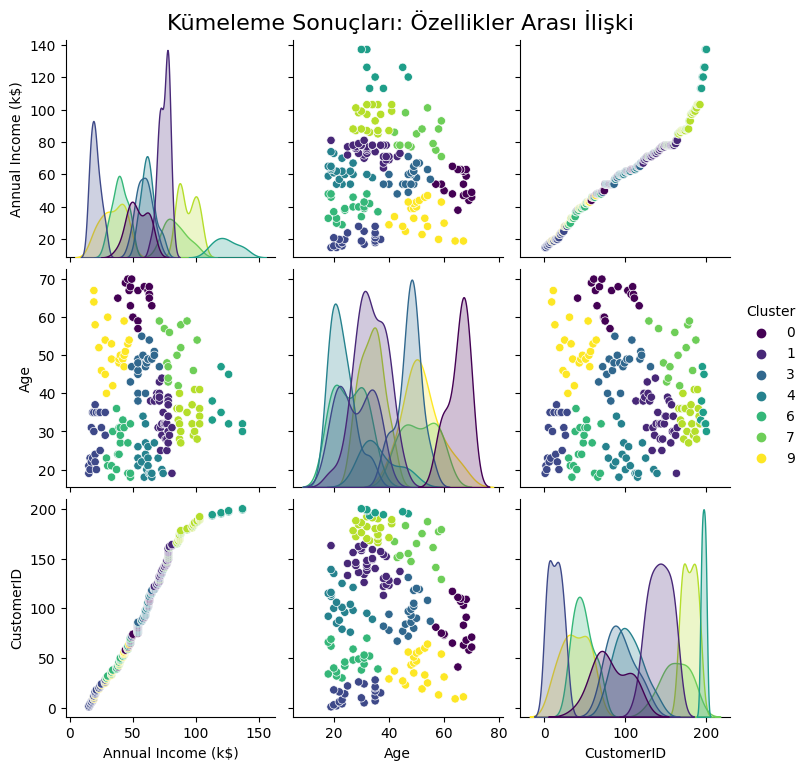

In [14]:

# Özellikler için bir pairplot oluşturalım
plt.figure(figsize=(12, 10))
sns.pairplot(data, hue='Cluster', vars=['Annual Income (k$)', 'Age', 'CustomerID'], palette='viridis')
plt.suptitle('Kümeleme Sonuçları: Özellikler Arası İlişki', y=1.02, fontsize=16)
plt.show()

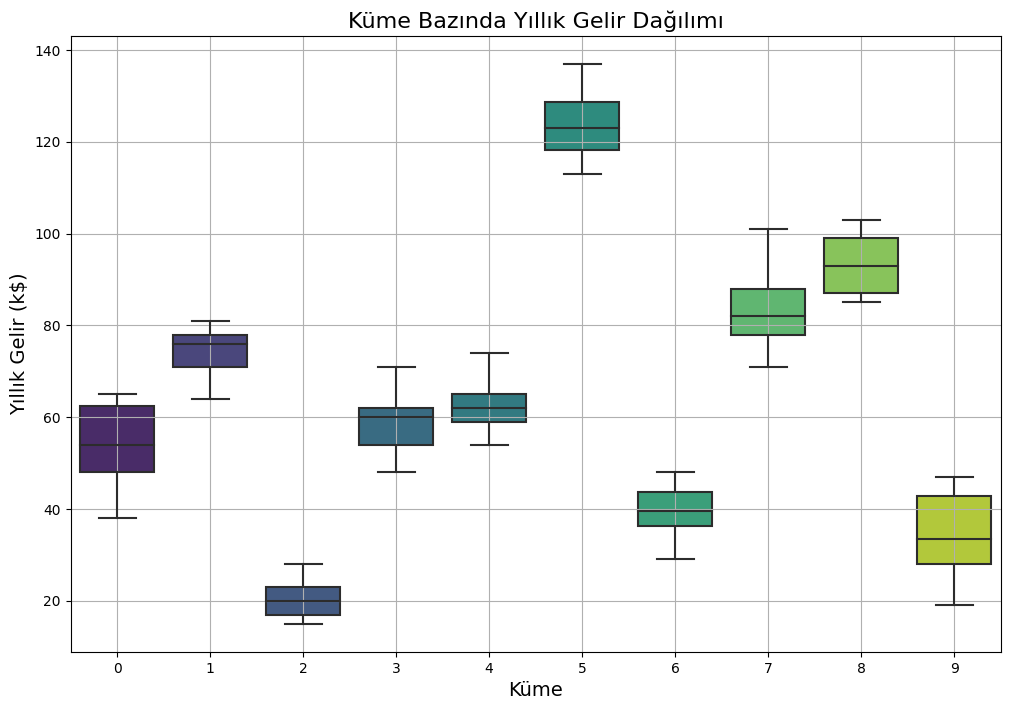

In [15]:
#Her bir küme için yıllık gelir dağılımını göstermek için bir boxplot kullandım:

plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=data, palette='viridis')
plt.title('Küme Bazında Yıllık Gelir Dağılımı', fontsize=16)
plt.xlabel('Küme', fontsize=14)
plt.ylabel('Yıllık Gelir (k$)', fontsize=14)
plt.grid()
plt.show()

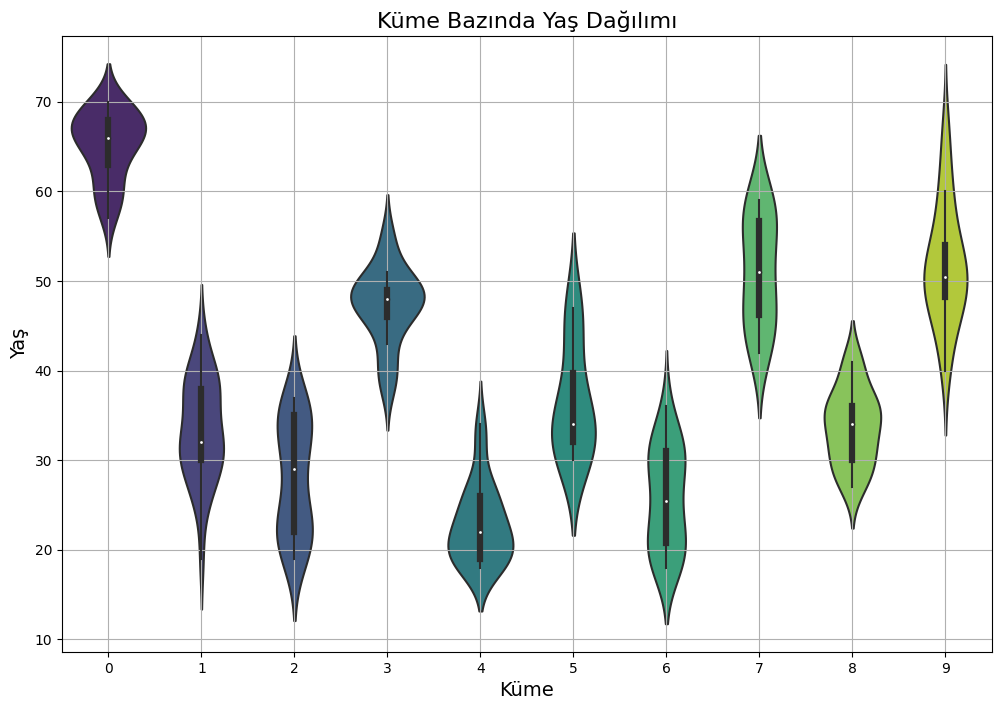

In [16]:
#Her bir küme için yaş dağılımını göstermek için bir violin plot kullandım:

plt.figure(figsize=(12, 8))
sns.violinplot(x='Cluster', y='Age', data=data, palette='viridis')
plt.title('Küme Bazında Yaş Dağılımı', fontsize=16)
plt.xlabel('Küme', fontsize=14)
plt.ylabel('Yaş', fontsize=14)
plt.grid()
plt.show()

**Sonuç ve Değerlendirme**
Bu çalışma, müşteri verileri üzerinden yapılan K-means kümeleme analizi ile çeşitli müşteri segmentlerinin belirlenmesine odaklanmıştır. Elde edilen sonuçlar, farklı demografik özellikler ve gelir seviyelerine sahip müşteri gruplarının tanımlanmasına olanak sağlamıştır.

**Kümeleme Analizinin Özeti:**

*Küme Özellikleri:* Her küme, belirli bir gelir ve yaş dağılımına sahip olup, müşteri davranışlarını anlamak için önemli bilgiler sunmaktadır.
*Küme Büyüklükleri:* Farklı segmentlerin büyüklükleri, hangi grupların daha yoğun olduğunu ve dolayısıyla pazarlama stratejilerinin nasıl şekilleneceğini göstermektedir.
Görselleştirme: Yapılan görselleştirmeler, veri setindeki ilişkileri ve farklı müşteri gruplarını daha iyi anlamamıza yardımcı olmuştur.
*Hedef Kitle Stratejisi:*
Ekonomik Ürünler: Düşük gelirli genç segmentler için uygun fiyatlı ürünler ve kampanyalar oluşturulmalıdır.
*Lüks Ürünler:* Yüksek gelirli ve genç kitle için premium ürünler ve özel etkinlikler planlanmalıdır.
*Aile Odaklı Ürünler:* Orta yaş grubu için aile odaklı çözümler ve deneyim fırsatları sunulmalıdır.
*Sağlık ve Emeklilik Ürünleri:* Yaşlı segment için sağlık hizmetleri ve emeklilik ürünleri önerilmelidir.

**Öneriler:**
Veri Güncellemeleri: Müşteri verilerinin düzenli olarak güncellenmesi, segmentlerin doğru bir şekilde değerlendirilmesi için kritik öneme sahiptir.
Pazarlama Kampanyaları: Her segment için özelleştirilmiş pazarlama stratejileri geliştirilmelidir.
Hedef Kitle Analizi: Kümeleme sonuçlarına dayalı olarak hedef kitle analizi yapılmalı ve kampanyalar bu analizlere göre şekillendirilmelidir.

**Kapanış:**

Bu çalışma, müşteri segmentasyonunu anlamak ve bu bilgiler doğrultusunda stratejik kararlar almak için önemli bir temel sunmaktadır. Gelecek analizlerde daha fazla özellik eklenerek veya farklı algoritmalar kullanılarak sonuçların derinlemesine incelenmesi önerilmektedir.

Kümeleme analizi, işletmelerin müşteri ihtiyaçlarını daha iyi anlamalarına ve rekabet avantajı elde etmelerine yardımcı olacaktır. Teşekkürler!